In [78]:
import numpy as np
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
Data=pd.read_csv(r"C:\Users\Saurabh\Desktop\New folder (4)\files\unique_data (1).csv")

In [81]:
Data["assign_duration_new"]=Data["assign_duration"].str.replace(" days 00:00:00","")
Data["assign_duration_new"]=Data["assign_duration_new"].str.replace(" days","")
Data["assign_duration_new"]=Data["assign_duration_new"].str.split(" ")
Data["assign_duration_new"]=Data["assign_duration_new"].str[0]
Data["assign_duration_new"]=Data["assign_duration_new"].astype(int)

In [82]:
Data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [83]:
Data["amount_new"]=Data["amount"].astype(int)

In [95]:
Data_numerical_features.columns

Index(['company_id', 'corporation_policy_id', 'family_size', 'actual_weight',
       'tl_num_of_bedroom', 'amount', 'assign_duration_new', 'amount_new'],
      dtype='object')

In [85]:
Data_numerical_features = Data.select_dtypes(exclude='object')
Data_categorical_features = Data.select_dtypes(include='object')

In [162]:
Data

,company_id,corporation_policy_id,family_size,actual_weight,tl_num_of_bedroom,amount,assign_duration_new,amount_new,assignment_type_code,CITY_ORIG,COUNTRY_CODE_ORIG,CITY_DEST,COUNTRY_CODE_DEST,assignment_service_code,home_status_code,assign_sub_service_code,sub_service_status_code,assign_duration,corporation_policy_id_encod
0,78223,9426.0,1.0,0.0,0.0,775.953333,216.0,775.0,PERM,4013.716883,3956.412266,5744.677053,3964.314635,HOSTCTRY,OWN,TEMPLODG,INAC,216 days 00:00:00,0
1,78223,9426.0,1.0,0.0,0.0,1913.648462,216.0,1913.0,PERM,4013.716883,3956.412266,5744.677053,3964.314635,REALEST,OWN,HOMEPRCH,INAC,216 days 00:00:00,0
2,78223,9426.0,1.0,0.0,0.0,17158.178108,216.0,17158.0,PERM,4013.716883,3956.412266,5744.677053,3964.314635,REALEST,OWN,HOMESALE,INAC,216 days 00:00:00,0
3,78223,9426.0,1.0,18815.2,0.0,3523.399444,216.0,3523.0,PERM,4013.716883,3956.412266,5744.677053,3964.314635,SHIPMENT,OWN,SHIPMENT,INAC,216 days 00:00:00,0
4,78223,9426.0,1.0,0.0,0.0,2221.466667,305.0,2221.0,PERM,3230.498667,3956.412266,5450.672178,3964.314635,HOSTCTRY,OWN,TEMPLODG,INAC,305 days 11:57:29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,78223,9436.0,1.0,0.0,0.0,5000.000000,20.0,5000.0,PERM,5830.382503,3956.412266,3636.858974,3964.314635,EXPENSE,RENT,EXPNFORM,INAC,20 days,3
28545,8472,12757.0,1.0,0.0,0.0,10000.000000,3.0,10000.0,PERM,8328.494648,3956.412266,8543.257732,3964.314635,EXPENSE,RENT,LUMPSUM,INAC,3 days,55
28546,45474,17037.0,1.0,0.0,0.0,7500.000000,14.0,7500.0,PERM,4010.497153,3956.412266,3202.050279,3964.314635,EXPENSE,RENT,LUMPSUM,INAC,14 days,84
28547,8472,12757.0,1.0,0.0,0.0,10000.000000,6.0,10000.0,PERM,8061.542052,3956.412266,8328.494648,3964.314635,EXPENSE,RENT,LUMPSUM,INAC,6 days,55


In [97]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [88]:
num_new=Data_numerical_features.iloc[:,1:].apply(lambda x : outlier_cap(x))

In [96]:
num_new

,corporation_policy_id,family_size,actual_weight,tl_num_of_bedroom,amount,assign_duration_new,amount_new
0,9426.0,1.0,0.0,0.0,775.953333,216.0,775.0
1,9426.0,1.0,0.0,0.0,1913.648462,216.0,1913.0
2,9426.0,1.0,0.0,0.0,17158.178108,216.0,17158.0
3,9426.0,1.0,18815.2,0.0,3523.399444,216.0,3523.0
4,9426.0,1.0,0.0,0.0,2221.466667,305.0,2221.0
...,...,...,...,...,...,...,...
28544,9436.0,1.0,0.0,0.0,5000.000000,20.0,5000.0
28545,12757.0,1.0,0.0,0.0,10000.000000,3.0,10000.0
28546,17037.0,1.0,0.0,0.0,7500.000000,14.0,7500.0
28547,12757.0,1.0,0.0,0.0,10000.000000,6.0,10000.0


In [90]:
Data2=pd.concat([num_new,Data_categorical_features],axis=1)

In [98]:
Data2=pd.concat([Data_numerical_features["company_id"],Data2],axis=1)

In [100]:
Data.describe()

,company_id,corporation_policy_id,family_size,actual_weight,tl_num_of_bedroom,amount,assign_duration_new,amount_new
count,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000
mean,47561.862657,12506.753476,1.426250,1628.228905,0.129672,4081.708345,190.995026,4081.384672
std,28325.204092,2822.539887,0.945813,3926.651889,0.589537,8355.117705,828.529830,8355.160826
min,8472.000000,9302.000000,1.000000,0.000000,0.000000,1.600000,0.000000,1.000000
25%,8472.000000,9436.000000,1.000000,0.000000,0.000000,1191.341667,51.000000,1191.000000
50%,60915.000000,12756.000000,1.000000,0.000000,0.000000,2216.800000,103.000000,2216.000000
75%,78223.000000,13863.000000,1.000000,1166.000000,0.000000,5000.000000,188.000000,5000.000000
max,78223.000000,22197.000000,10.000000,145800.000000,40.000000,546888.294000,66534.000000,546888.000000


In [101]:
Data2.describe()

,company_id,corporation_policy_id,family_size,actual_weight,tl_num_of_bedroom,amount,assign_duration_new,amount_new
count,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000,28549.000000
mean,47561.862657,12506.856317,1.421206,1575.103268,0.120810,3785.194917,177.901993,3784.872024
std,28325.204092,2819.796053,0.919447,3541.501915,0.396952,4130.043416,230.943812,4130.139673
min,8472.000000,9426.000000,1.000000,0.000000,0.000000,65.388000,1.000000,65.000000
25%,8472.000000,9436.000000,1.000000,0.000000,0.000000,1191.341667,51.000000,1191.000000
50%,60915.000000,12756.000000,1.000000,0.000000,0.000000,2216.800000,103.000000,2216.000000
75%,78223.000000,13863.000000,1.000000,1166.000000,0.000000,5000.000000,188.000000,5000.000000
max,78223.000000,21686.000000,5.000000,18815.200000,2.000000,23216.701867,1209.000000,23216.400000


In [102]:
Data.quantile([0.25,0.5,0.75,0.9])

,company_id,corporation_policy_id,family_size,actual_weight,tl_num_of_bedroom,amount,assign_duration_new,amount_new
0.25,8472.0,9436.0,1.0,0.0,0.0,1191.341667,51.0,1191.0
0.50,60915.0,12756.0,1.0,0.0,0.0,2216.800000,103.0,2216.0
0.75,78223.0,13863.0,1.0,1166.0,0.0,5000.000000,188.0,5000.0
0.90,78223.0,14977.0,3.0,5260.0,0.0,10000.000000,416.0,10000.0


In [103]:
Data=Data2

In [136]:
Data["corporation_policy_id"].value_counts()

12756.0    3864
13865.0    3705
9429.0     2983
9428.0     2265
13341.0    1370
           ... 
11314.0       1
11309.0       1
12761.0       1
19390.0       1
19389.0       1
Name: corporation_policy_id, Length: 99, dtype: int64

C:\Users\Saurabh\anaconda3\envs\Claimfraud\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='corporation_policy_id_encod', ylabel='count'>

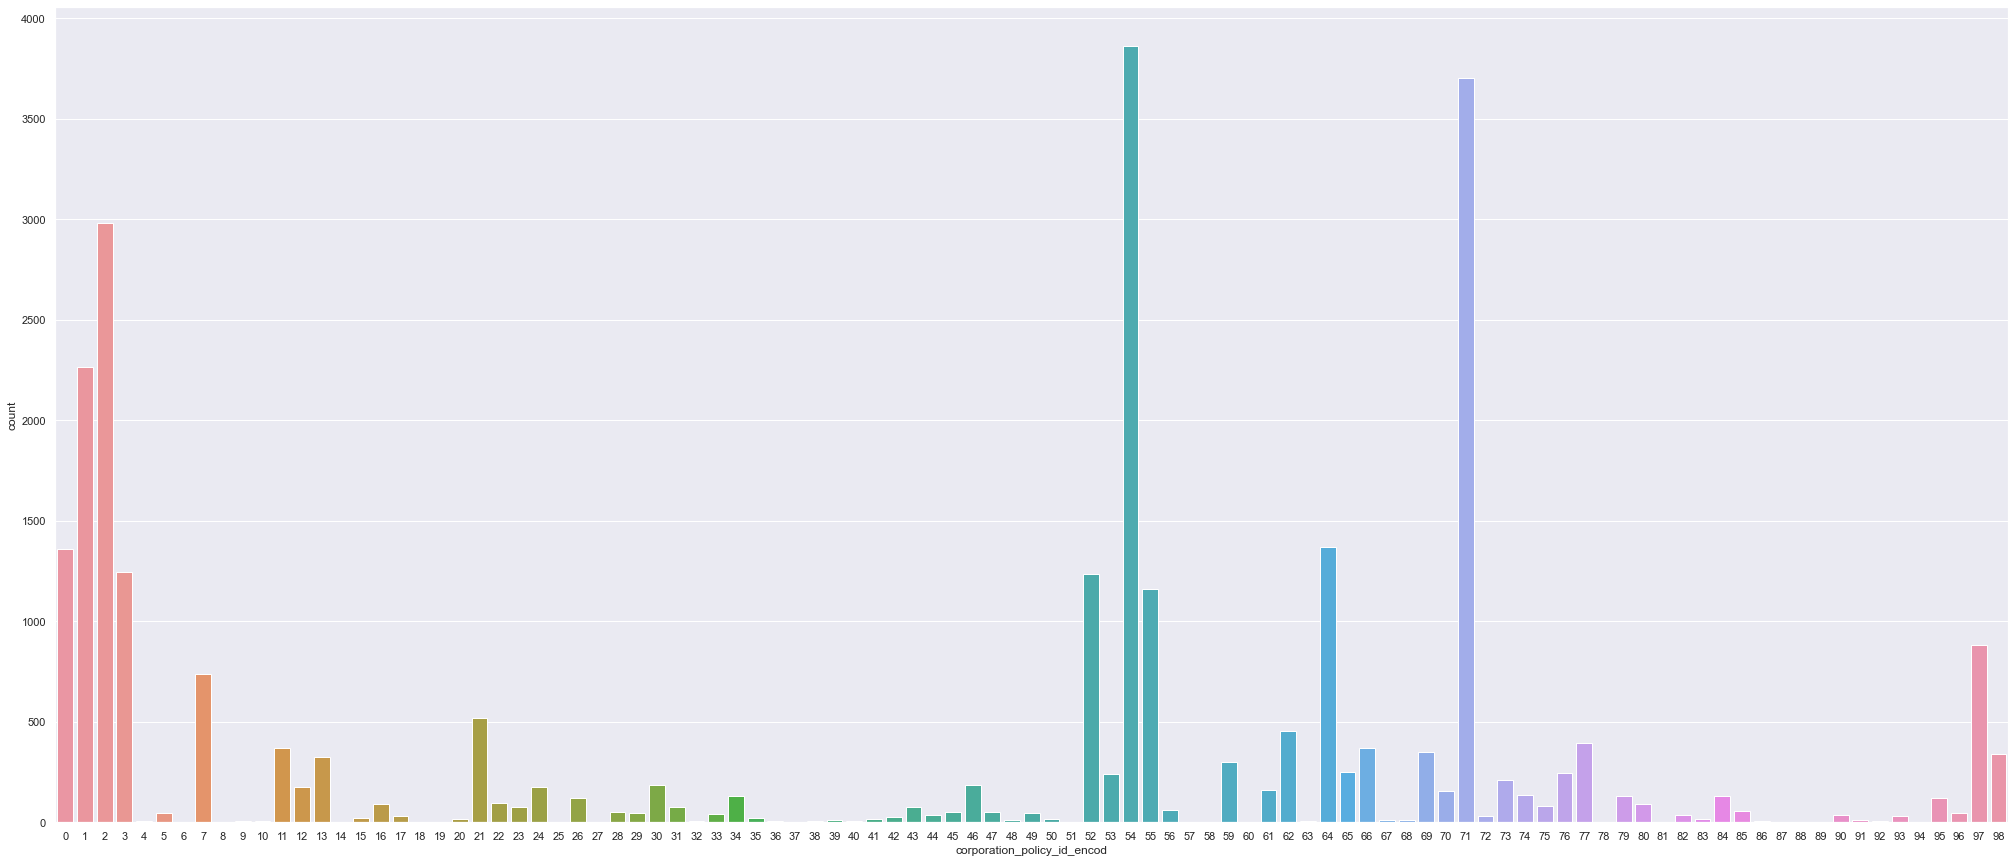

In [137]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
Data['corporation_policy_id_encod'] = le.fit_transform(Data['corporation_policy_id'])
sns.set(style ="darkgrid")
sns.countplot(Data['corporation_policy_id_encod'])

In [140]:
Data['corporation_policy_id_encod']

0         0
1         0
2         0
3         0
4         0
         ..
28544     3
28545    55
28546    84
28547    55
28548    84
Name: corporation_policy_id_encod, Length: 28549, dtype: int64

In [105]:
encoder = TargetEncoder()
Data['CITY_ORIG'] = encoder.fit_transform(Data['CITY_ORIG'], Data['amount_new'])

C:\Users\Saurabh\anaconda3\envs\Claimfraud\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Saurabh\anaconda3\envs\Claimfraud\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [106]:
Data['CITY_DEST'] = encoder.fit_transform(Data['CITY_DEST'], Data['amount_new'])

In [107]:
Data["COUNTRY_CODE_ORIG"]=encoder.fit_transform(Data['COUNTRY_CODE_ORIG'], Data['amount_new'])

In [108]:
Data["COUNTRY_CODE_DEST"]=encoder.fit_transform(Data['COUNTRY_CODE_DEST'], Data['amount_new'])

In [109]:
Data["assignment_type_code"].value_counts()

PERM    26013
INTR     1126
SHTM      810
LGTM      535
STFM       57
RLTM        4
CMTR        4
Name: assignment_type_code, dtype: int64

In [110]:
Data1=pd.get_dummies(data=Data, columns=['assignment_type_code', 'assignment_service_code','home_status_code','assign_sub_service_code','sub_service_status_code'])

In [111]:
Data1.drop(['assign_duration', 'amount'],axis=1,inplace=True)

In [112]:
Data1.drop(['sub_service_status_code_INAC'],axis=1,inplace=True)

In [141]:
Data1['corporation_policy_id_encod']=Data['corporation_policy_id_encod']

In [142]:
Data1.drop(["corporation_policy_id"],axis=1,inplace=True)

In [145]:
Data1["amount_new"]=Data['amount_new']

In [146]:
Data1

,company_id,family_size,actual_weight,tl_num_of_bedroom,assign_duration_new,CITY_ORIG,COUNTRY_CODE_ORIG,CITY_DEST,COUNTRY_CODE_DEST,assignment_type_code_CMTR,...,assign_sub_service_code_SCHLSRCH,assign_sub_service_code_SPSESPPT,assign_sub_service_code_TRVLASST,assign_sub_service_code_TRVLFTRP,assign_sub_service_code_TRVLHMLV,assign_sub_service_code_TRVLHMSR,assign_sub_service_code_TRVLPREA,assign_sub_service_code_TRVLSHRT,corporation_policy_id_encod,amount_new
0,78223,1.0,0.0,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,775.0
1,78223,1.0,0.0,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,1913.0
2,78223,1.0,0.0,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,17158.0
3,78223,1.0,18815.2,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,3523.0
4,78223,1.0,0.0,0.0,305.0,3230.498667,3956.412266,5450.672178,3964.314635,0,...,0,0,0,0,0,0,0,0,0,2221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,78223,1.0,0.0,0.0,20.0,5830.382503,3956.412266,3636.858974,3964.314635,0,...,0,0,0,0,0,0,0,0,3,5000.0
28545,8472,1.0,0.0,0.0,3.0,8328.494648,3956.412266,8543.257732,3964.314635,0,...,0,0,0,0,0,0,0,0,55,10000.0
28546,45474,1.0,0.0,0.0,14.0,4010.497153,3956.412266,3202.050279,3964.314635,0,...,0,0,0,0,0,0,0,0,84,7500.0
28547,8472,1.0,0.0,0.0,6.0,8061.542052,3956.412266,8328.494648,3964.314635,0,...,0,0,0,0,0,0,0,0,55,10000.0


In [147]:
amount=Data1["amount_new"]

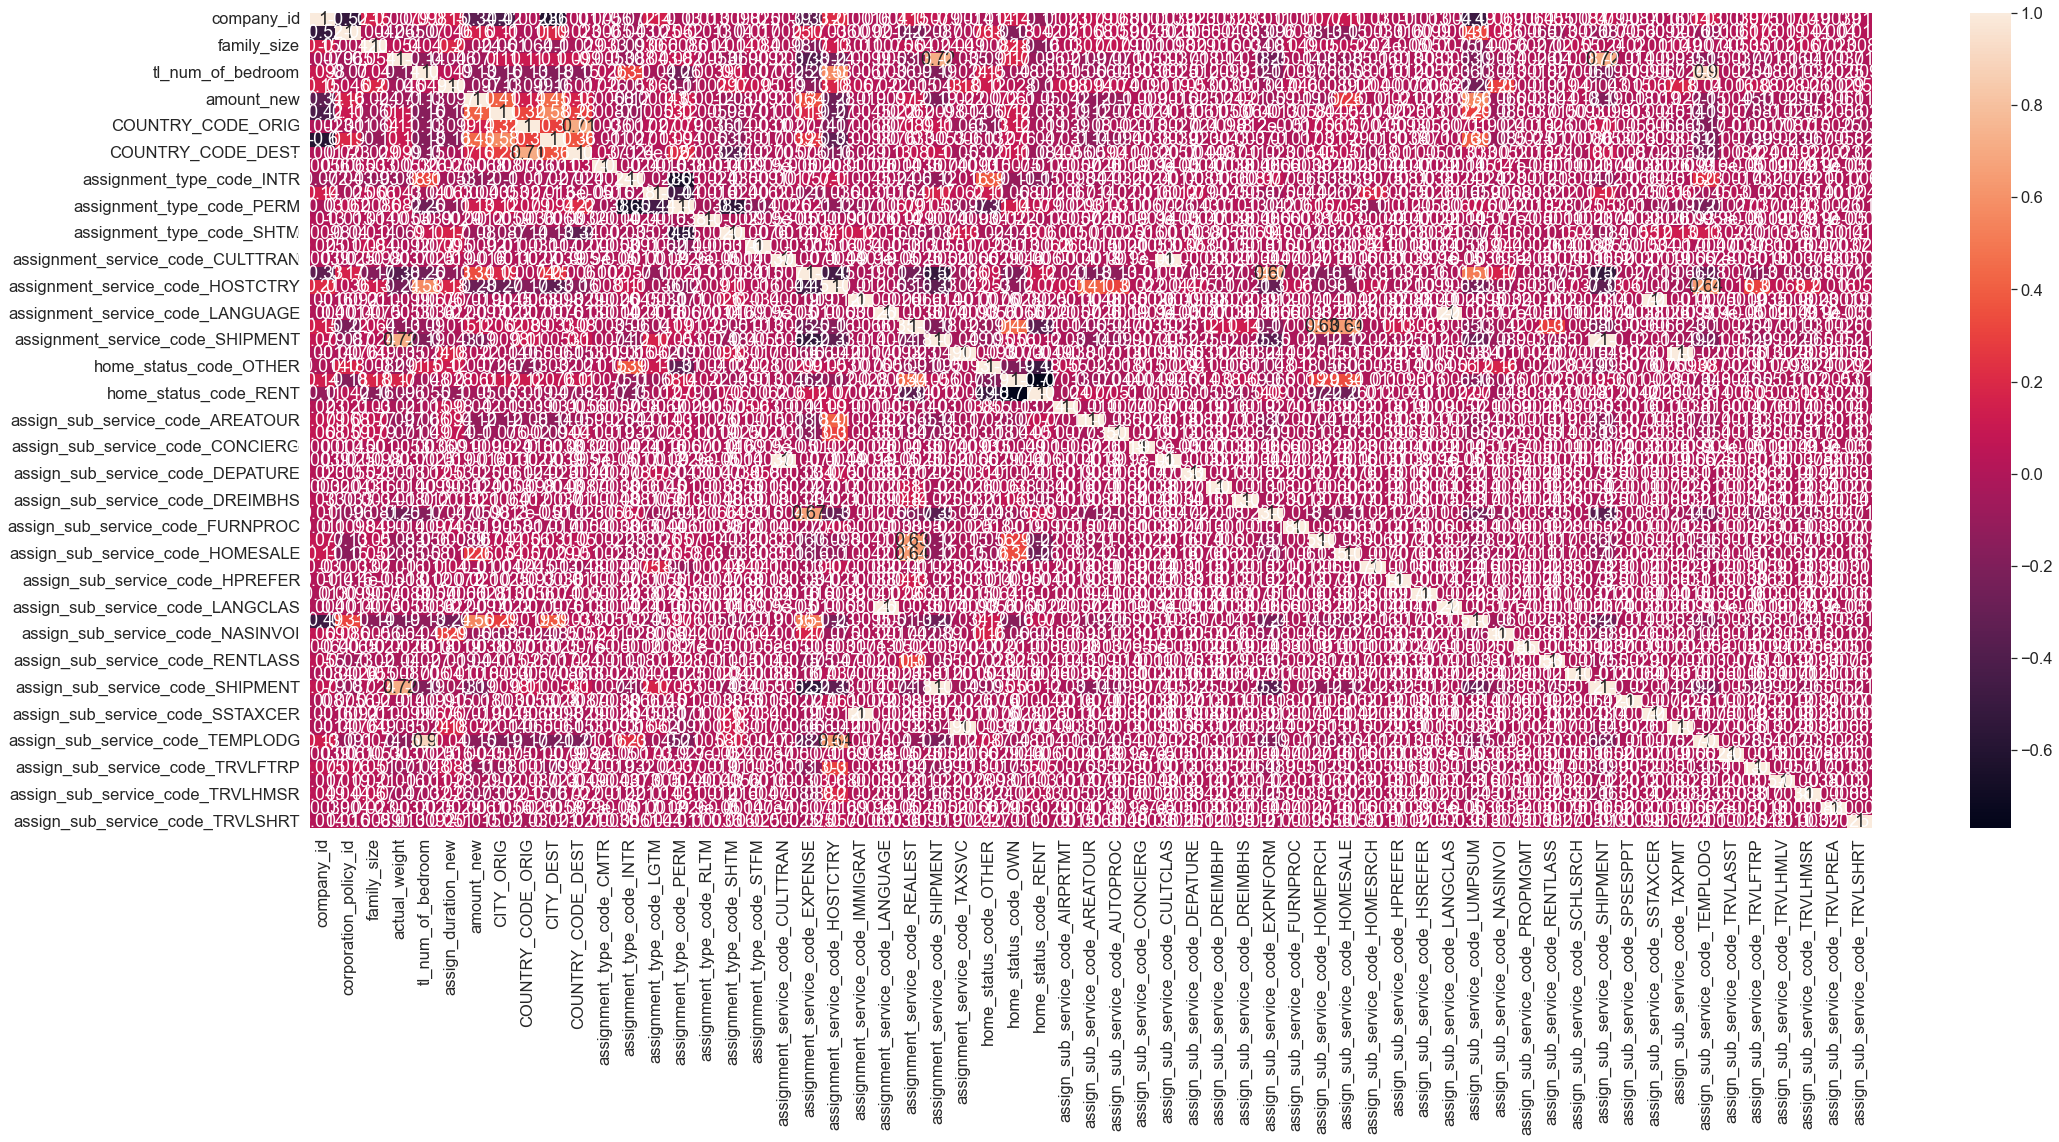

In [114]:
import seaborn as sns
sns.set(rc={'figure.figsize':(35,15)})
sns.set(font_scale=1.5)
#plotting the heatmap for correlation
ax = sns.heatmap(Data1.corr(), annot=True)


In [148]:

# Create correlation matrix
corr_matrix = Data1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_14520\2936466213.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [149]:
to_drop

[]

In [150]:
Data1.drop(["amount_new"],axis=1,inplace=True)

In [123]:
Data1.drop(['home_status_code_RENT',
 'assign_sub_service_code_CULTCLAS',
 'assign_sub_service_code_LANGCLAS',
 'assign_sub_service_code_SHIPMENT',
 'assign_sub_service_code_SSTAXCER',
 'assign_sub_service_code_TAXPMT',
 'assign_sub_service_code_TEMPLODG'],axis=1,inplace=True)

In [151]:
Data1

,company_id,family_size,actual_weight,tl_num_of_bedroom,assign_duration_new,CITY_ORIG,COUNTRY_CODE_ORIG,CITY_DEST,COUNTRY_CODE_DEST,assignment_type_code_CMTR,...,assign_sub_service_code_RENTLASS,assign_sub_service_code_SCHLSRCH,assign_sub_service_code_SPSESPPT,assign_sub_service_code_TRVLASST,assign_sub_service_code_TRVLFTRP,assign_sub_service_code_TRVLHMLV,assign_sub_service_code_TRVLHMSR,assign_sub_service_code_TRVLPREA,assign_sub_service_code_TRVLSHRT,corporation_policy_id_encod
0,78223,1.0,0.0,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,0
1,78223,1.0,0.0,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,0
2,78223,1.0,0.0,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,0
3,78223,1.0,18815.2,0.0,216.0,4013.716883,3956.412266,5744.677053,3964.314635,0,...,0,0,0,0,0,0,0,0,0,0
4,78223,1.0,0.0,0.0,305.0,3230.498667,3956.412266,5450.672178,3964.314635,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,78223,1.0,0.0,0.0,20.0,5830.382503,3956.412266,3636.858974,3964.314635,0,...,0,0,0,0,0,0,0,0,0,3
28545,8472,1.0,0.0,0.0,3.0,8328.494648,3956.412266,8543.257732,3964.314635,0,...,0,0,0,0,0,0,0,0,0,55
28546,45474,1.0,0.0,0.0,14.0,4010.497153,3956.412266,3202.050279,3964.314635,0,...,0,0,0,0,0,0,0,0,0,84
28547,8472,1.0,0.0,0.0,6.0,8061.542052,3956.412266,8328.494648,3964.314635,0,...,0,0,0,0,0,0,0,0,0,55


In [152]:
#X = Data_processed.drop(['actual_amount'],axis=1,inplace=True)
y = np.array(amount).reshape(-1, 1)
X= Data1
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
#df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.5240072218455061


In [153]:
y_pred = regr.predict(X_test)

In [154]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 1877.8922955069418
MSE: 8969664.425556494
RMSE: 2994.9398033276884


In [155]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE


# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))


[14:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  2420.005579


In [156]:
print(xgb_r.score(X_test, y_test))

0.6892172520051358


In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [159]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22839, 53)
(22839, 1)
(5710, 53)
(5710, 1)


In [ ]:
# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=53, input_dim=53, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=53, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.2))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 50, verbose=1)

# Generating Predictions on testing data
Predictions_orig=model.predict(X_test)

# # Scaling the predicted Price data back to original price scale
# Predictions=TSF.inverse_transform(Predictions_orig)

# # Scaling the y_test Price data back to original price scale
# y_test_orig=TSF.inverse_transform(y_test)

# Scaling the test data back to original scale
#Test_Data=PredictorScalerFit.inverse_transform(X_test)

# TestingData=pd.DataFrame()
# TestingData['Amount']=y_test_orig
# TestingData['PredictedAmountOrig']=Predictions_orig
# TestingData['PredictedAmount']=Predictions
# TestingData.head()

In [ ]:
##drop service code
##use sub_service code
##include assignment id
##incluse all assigment status